In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart = pd.read_csv(open(r'C:\ExpertS\jantunghci.csv'))
heart.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
ï»¿age      303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

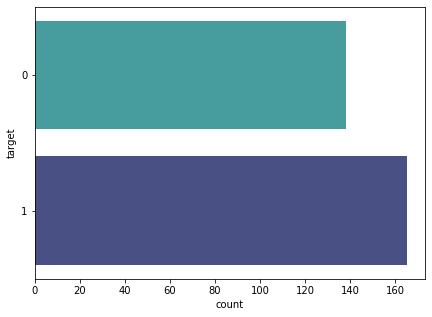

In [6]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="target", data=heart, palette="mako_r");

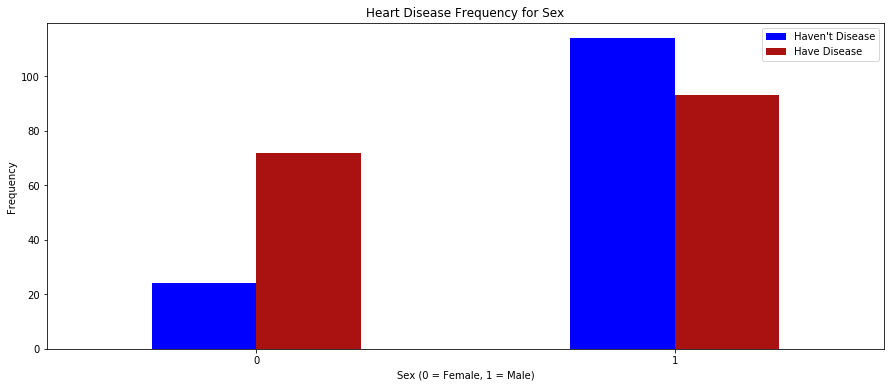

In [7]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

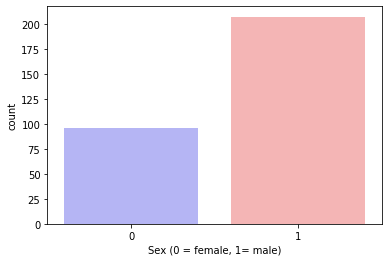

In [8]:
sns.countplot(x='sex', data=heart, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [9]:
# Variabel independen
x = heart.drop(["target"], axis = 1)
x.head()


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
# Variabel dependen
y = heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
modelnb = GaussianNB()

In [15]:
nbtrain = modelnb.fit(x_train, y_train)

In [16]:
nbtrain.class_count_

array([108., 134.])

In [17]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [18]:
nbtrain.predict_proba(x_test)

array([[5.82571613e-04, 9.99417428e-01],
       [9.99240610e-01, 7.59390366e-04],
       [9.99938869e-01, 6.11309321e-05],
       [9.99992658e-01, 7.34177465e-06],
       [3.63366729e-03, 9.96366333e-01],
       [9.99951069e-01, 4.89308903e-05],
       [8.58720034e-03, 9.91412800e-01],
       [5.98819913e-01, 4.01180087e-01],
       [5.96228807e-04, 9.99403771e-01],
       [9.33511439e-01, 6.64885614e-02],
       [9.97942318e-01, 2.05768198e-03],
       [4.57117589e-01, 5.42882411e-01],
       [9.99999986e-01, 1.36224796e-08],
       [9.99995730e-01, 4.26988712e-06],
       [5.16991611e-01, 4.83008389e-01],
       [1.00000000e+00, 5.08353833e-11],
       [9.10174530e-01, 8.98254697e-02],
       [9.86808541e-01, 1.31914589e-02],
       [5.72076923e-01, 4.27923077e-01],
       [2.24348439e-01, 7.75651561e-01],
       [1.35283843e-01, 8.64716157e-01],
       [9.99163302e-01, 8.36698360e-04],
       [4.11827050e-05, 9.99958817e-01],
       [9.82142245e-01, 1.78577552e-02],
       [9.874878

In [19]:
nbtrain.predict_proba(x_test)

array([[5.82571613e-04, 9.99417428e-01],
       [9.99240610e-01, 7.59390366e-04],
       [9.99938869e-01, 6.11309321e-05],
       [9.99992658e-01, 7.34177465e-06],
       [3.63366729e-03, 9.96366333e-01],
       [9.99951069e-01, 4.89308903e-05],
       [8.58720034e-03, 9.91412800e-01],
       [5.98819913e-01, 4.01180087e-01],
       [5.96228807e-04, 9.99403771e-01],
       [9.33511439e-01, 6.64885614e-02],
       [9.97942318e-01, 2.05768198e-03],
       [4.57117589e-01, 5.42882411e-01],
       [9.99999986e-01, 1.36224796e-08],
       [9.99995730e-01, 4.26988712e-06],
       [5.16991611e-01, 4.83008389e-01],
       [1.00000000e+00, 5.08353833e-11],
       [9.10174530e-01, 8.98254697e-02],
       [9.86808541e-01, 1.31914589e-02],
       [5.72076923e-01, 4.27923077e-01],
       [2.24348439e-01, 7.75651561e-01],
       [1.35283843e-01, 8.64716157e-01],
       [9.99163302e-01, 8.36698360e-04],
       [4.11827050e-05, 9.99958817e-01],
       [9.82142245e-01, 1.78577552e-02],
       [9.874878

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[27,  3],
       [ 7, 24]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [23]:
y_actual = pd.Series([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], name = "actual")
y_pred = pd.Series([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,27,3
1,7,24


In [24]:
print(confusion_matrix(y_actual, y_pred))

[[27  3]
 [ 7 24]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

